# AAFragpy tutorial

`aafragpy` is a Python package that provide the set of functions that allow to calculate:
- matrix of differential cross-sections of secondary particle production in nuclear interaction for a given combination of primary and target nuclei for a given range of energies (function `get_cross_section`);
- differential spectrum of secondary particles produced in the interaction of a given primary spectrum with target nuclei (function `get_spectrum`).

Units of routines are: GeV for energy, mb for cross-sections.

`aafragpy` uses high-energy cross-section parameterisations obtained using the results of QGSJET-II-04m calculations (M Kachelrieß et al., Comp. Phys. Comm. 2019).
For the calculation of the secondaries produced by low-energy primaries the opportunity to use codes from Kamae et al. 2006 and Kafexhiu et al. 2014 (GEANT-based, for gamma-rays only) is presented.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import log10, sqrt

Here we define the spectrum of primary particles. In this example, we use a powerlaw in momentum, with slope $\Gamma=-2$, in the energy range from $1$ to $10^{10}$ GeV.  We also introduce a fixed "threshold" energy above which we will use AAfrag.

In [2]:
m_p=0.938 # proton rest energy in GeV
Gamma=-2. # spectral slope
E_thr = 4 # "threshold" energy in GeV

E_p=np.logspace(0,10,100)          # kinetic energies of primary particles in GeV, 10 bins per decade
p_p=sqrt(E_p**2-m_p**2)            # momenta of primary particles 
dNp_dEp=p_p**Gamma*E_p/p_p         # differential energy spectrum

We define the energy binning of the secondary particle spectra:

In [3]:
E_s=np.logspace(-3,10,130)

`get_cross_section`provides a maxrix of values of differential cross-sections in different interactions and production channels for multiple values of the primary particle energy

In [4]:
#import AAFragpy routine for differential cross-section
from aafragpy import get_cross_section
get_cross_section?

Signature:
get_cross_section(
    secondary,
    primary_target,
    E_primaries=None,
    E_secondaries=None,
)
Docstring:
Reconstruсt cross-section values for given values of the total energy for
primary and secondary particle combination.

Return the matrix of differential cross-section, vector of primary total
energy and secondary energy.

If primary and secondary energies are not set, the default binning will be used.

Parameters
----------
secondary (str): Secondary particle produced in the nucleon-nucleon
interaction.
    Allowed inputs are: gam, posi, el, nu_e, anu_e, mu_mu, amu_mu, nu_all
primary_target (str): Primary/target combination.
E_primaries (list or tuple or numpy.ndarray): optional
    Vector of the primary particle energy (in GeV) of the size M.
    The default values are taken from the tables.
E_secondaries (list or tuple or numpy.ndarray): optiona
    Vector of the secondary particle energy (in GeV) of the size N.
    The default values are taken from the tables.


Allowed primary/target combinations:
    `p-p`,
    `p-He`,
    `He-p`,
    `He-He`,
    `C-p`,
    `Al-p`,
    `Fe-p`

Allowed secondary particles are:

| Particle | code |
|----------|------|
| $\gamma$ | `gam`|
|   $e^-$  | `el` |
|   $e^+$  | `pos`|
|${\nu_e}$ |`nu_e`|
| $\bar{\nu_e}$ | `anu_e` |
| ${\nu_{\mu}}$ | `nu_mu` |
| $\bar{\nu_{\mu}}$ | `anu_mu` |
| $\sum{\nu}$ | `nu_all` |
|   $p^+$  | `p` |
|   $p^-$  | `ap`|
|   $n$  | `n` |
|   $\bar{n}$  | `an`|

In [5]:
cs_matrix = get_cross_section ('gam','p-p',E_primaries=E_p[E_p>E_thr],E_secondaries=E_s)

`get_spectrum` function performs integration of production spectra over a range of primary particle energies

In [6]:
from aafragpy import get_spectrum
get_spectrum?

Signature: get_spectrum(energy_primary, energy_secondary, cs_matrix, prim_spectrum)
Docstring:
Calculate the spectrum of secondary particles.

Generates differential secondary particle spectrum for given
    secondary differential cross-section matrix and primary spectrum.

Parameters
----------
energy_primary (numpy ndarray): Vector of primary energies, GeV
energy_secondary (numpy ndarray): Vector of secondary energies, GeV
cs_matrix (numpy ndarray): Matrix of differential cross-section
nucl_spectrum (numpy ndarray): Primary spectrum

Returns
-------
(numpy ndarray 1D)
Differential spectrum of secondary particles
File:      ~/Dropbox/MEPhI/python/aafragpy/aafragpy/aafrag.py
Type:      function


In [7]:
spec=get_spectrum(E_p[E_p>E_thr],E_s,cs_matrix=cs_matrix[0],prim_spectrum=dNp_dEp[E_p>E_thr])

Text(0, 0.5, '$E^2 \\cdot dN/dE$')

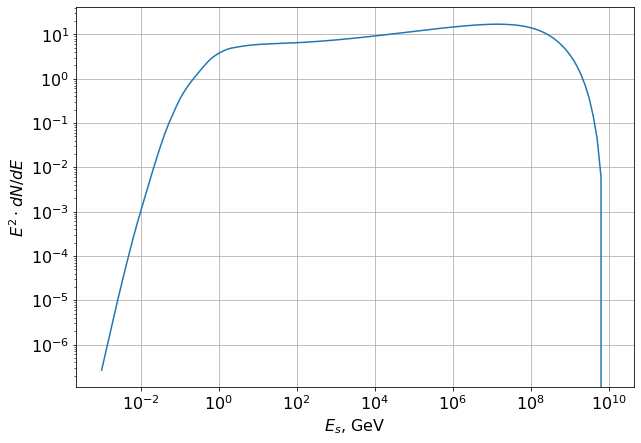

In [8]:
plt.figure(figsize=(10,7))
plt.loglog(E_s,spec*E_s**2)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid()
plt.xlabel('$E_s$, GeV',fontsize=16)
plt.ylabel('$E^2 \cdot dN/dE$',fontsize=16)

Users have an option to complement AAfrag model spectra with low-energy parameterisations of  Kamae2006 [2] or Kafexhiu2014 [3]. Both codes are applicable only for $pp$ interactions, Kamae2006 is suitable for calculation of lepton and gamma-ray production, while Kafexhiu2014 allows to calculate only gamma-ray production.

Functions for Kamae2006 and Kafexhiu2014 parameterisations have `_Kamae2006` and `_Kafexhiu2014` suffixes. Cross-sections for Kamae2006 parameterisations have additional selection parameter `diffractive`:


In [9]:
from aafragpy import get_cross_section_Kamae2006, get_cross_section_Kafexhiu2014
get_cross_section_Kamae2006?

Signature:
get_cross_section_Kamae2006(
    secondary,
    E_primaries,
    E_secondaries,
    diffractive=True,
)
Docstring:
Return  cross-section values (Kamae et al. 2006).

Return the matrix of the differential cross-section for a given
    combination of energy vectors, primary energy vector, secondary energy
    vector.
Based on Kamae et al. 2006
Calculations are performed for p-p interactions
    and for gamma and lepton production only.
Works good in low energies,
    but should be substituted by newer codes in high energies.
----------
secondary (str): Secondary particle of proton-proton interaction.
E_primaries (int or float or list or tuple or numpy.ndarray): 
    Vector of the primary proton energy (in GeV) of the size M.
E_secondaries (int or float or list or tuple or numpy.ndarray):
    Vector of the secondary particle energy (in GeV) of the size N.
diffractive (bool): Include or exclude diffractive processes

Returns
-------
(numpy ndarray 2D)
    Matrix MxN of the diffe

In [10]:
cs_matrix_Kamae2006=get_cross_section_Kamae2006('gam',E_primaries=E_p[E_p<=E_thr], E_secondaries=E_s)
cs_matrix_Kafexhiu2014=get_cross_section_Kafexhiu2014(E_primaries=E_p[E_p<=E_thr], E_secondaries=E_s)

spec_Kamae2006=get_spectrum(E_p[E_p<=E_thr],E_s,cs_matrix_Kamae2006[0],prim_spectrum=dNp_dEp[E_p<=E_thr])
spec_Kafexhiu2014=get_spectrum(E_p[E_p<=E_thr],E_s,cs_matrix_Kafexhiu2014[0],prim_spectrum=dNp_dEp[E_p<=E_thr])

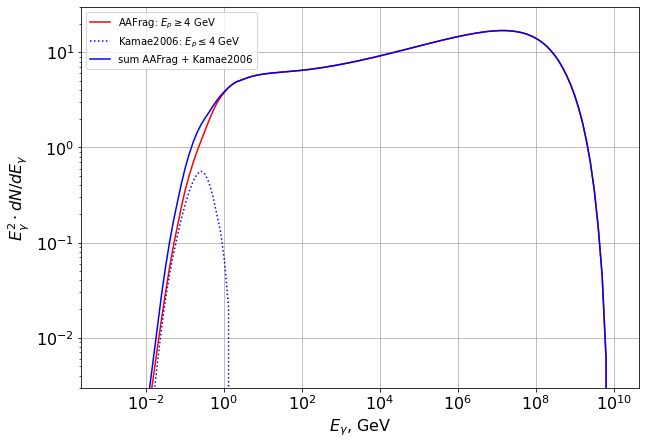

In [11]:
plt.figure(figsize=(10,7))


plt.loglog(E_s, spec*E_s**2,'r-', label="AAFrag: $E_p \geq "+str(E_thr)+"$ GeV")
plt.loglog(E_s, spec_Kamae2006*E_s**2,'b:', label="Kamae2006: $E_p\leq "+str(E_thr)+"$ GeV")
plt.loglog(E_s, (spec+spec_Kamae2006)*E_s**2,'b-', label="sum AAFrag + Kamae2006")

plt.xlabel('$E_\gamma$, GeV',fontsize=16)
plt.ylabel('$E_\gamma^2 \cdot dN/dE_\gamma$',fontsize=16)
plt.ylim(3e-3,30)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()
plt.grid()

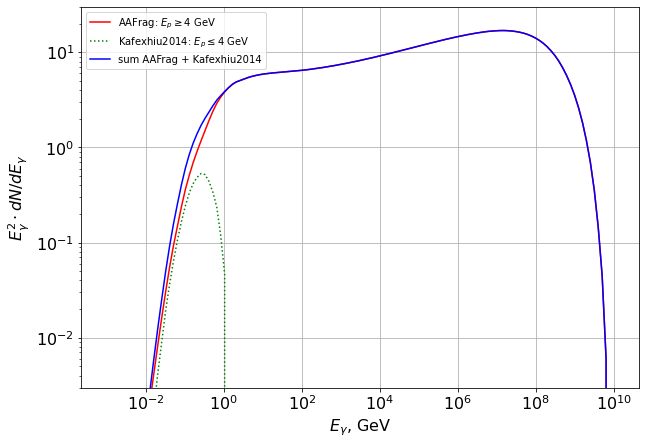

In [12]:
plt.figure(figsize=(10,7))

plt.loglog(E_s, spec*E_s**2,'r-', label="AAFrag: $E_p \geq "+str(E_thr)+"$ GeV")
plt.loglog(E_s, spec_Kafexhiu2014*E_s**2,'g:', label="Kafexhiu2014: $E_p\leq "+str(E_thr)+"$ GeV")
plt.loglog(E_s, (spec+spec_Kafexhiu2014)*E_s**2,'b-', label="sum AAFrag + Kafexhiu2014")

plt.xlabel('$E_\gamma$, GeV',fontsize=16)
plt.ylabel('$E_\gamma^2 \cdot dN/dE_\gamma$',fontsize=16)
plt.ylim(3e-3,30)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()
plt.grid()

## Please cite this work as:
TBA

## References:
1. M. Kachelrieß, I. V. Moskalenko, and S. Ostapchenko, “AAfrag: Interpolation routines for Monte Carlo results on secondary production in proton–proton, proton–nucleus and nucleus–nucleus interactions,” Comput. Phys. Commun., vol. 245, p. 106846, 2019. <https://doi.org/10.1016/j.cpc.2019.08.001>
2. T. Kamae, N. Karlsson, T. Mizuno, T. Abe, and T. Koi, “Parameterization of γ, e+-, and Neutrino Spectra Produced by p-p Interaction in Astronomical Environments,” Astrophys. J., vol. 647, no. 1, pp. 692–708, Aug. 2006. <http://dx.doi.org/10.1103/PhysRevD.90.123014>
3. E. Kafexhiu, F. Aharonian, A. M. Taylor, and G. S. Vila, “Parametrization of gamma-ray production cross-sections for pp interactions in a broad proton energy range from the kinematic threshold to PeV energies,” Phys. Rev. D - Part. Fields, Gravit. Cosmol., vol. 90, no. 12, pp. 1–19, Jun. 2014. <http://dx.doi.org/10.1103/PhysRevD.90.123014>